<a href="https://colab.research.google.com/github/ramdhanhdy/DS_Project/blob/main/macro_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setups

In [1]:
!pip install fredapi
!pip install quandl
!pip install nasdaq-data-link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from fredapi import Fred
import quandl
import nasdaqdatalink
from pandas.tseries.offsets import MonthBegin

In [3]:
fred_api_key = '0709c89c9622945e13782b9d046fb4b7'
fred = Fred(api_key=fred_api_key)

nasdaq_api_key = 'BxLocigoiJ5zo5coVXUz'
nasdaqdatalink.ApiConfig.api_key = nasdaq_api_key
quandl.api_config.api_key = nasdaq_api_key

# Consumer Price Index

In [4]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

r = urllib2.urlopen('https://data.nasdaq.com/api/v3/databases/RATEINF/metadata?api_key=BxLocigoiJ5zo5coVXUz').read()
file = ZipFile(BytesIO(r))
rateinf_meta = file.open("RATEINF_metadata.csv")
rateinf_meta = pd.read_csv(rateinf_meta)

rateinf_meta

,code,name,description,refreshed_at,from_date,to_date
0,CPI_ARG,Consumer Price Index - Argentina,Please visit <a href=http://www.rateinflation....,2020-10-10 02:03:32,1988-01-31,2013-12-31
1,CPI_AUS,Consumer Price Index - Australia,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1948-09-30,2022-09-30
2,CPI_CAN,Consumer Price Index - Canada,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1989-01-31,2022-09-30
3,CPI_CHE,Consumer Price Index - Switzerland,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1983-01-31,2022-09-30
4,CPI_DEU,Consumer Price Index - Germany,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1991-01-31,2022-09-30
5,CPI_EUR,Consumer Price Index - Euro Area,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1990-01-31,2022-09-30
6,CPI_FRA,Consumer Price Index - France,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1990-01-31,2022-09-30
7,CPI_GBR,Consumer Price Index - UK,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1988-01-31,2022-09-30
8,CPI_ITA,Consumer Price Index - Italy,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,2001-01-31,2022-09-30
9,CPI_JPN,Consumer Price Index - Japan,Please visit <a href=http://www.rateinflation....,2022-10-29 02:03:46,1970-01-31,2022-09-30


In [5]:
cpi_data = nasdaqdatalink.get('RATEINF/CPI_USA')
cpi_data = cpi_data.rename(columns={'Value':'cpi'})
cpi_data['cpi_growth'] = cpi_data['cpi'].pct_change(1)*100
cpi_data = cpi_data.rename_axis('date').reset_index()
cpi_data['date'] = cpi_data['date'] - MonthBegin(1)
cpi_data = cpi_data.set_index('date')
cpi_data

,cpi,cpi_growth
date,,
1913-01-01,9.800,NaN
1913-02-01,9.800,0.000000
1913-03-01,9.800,0.000000
1913-04-01,9.800,0.000000
1913-05-01,9.700,-1.020408
...,...,...
2022-05-01,292.296,1.102352
2022-06-01,296.311,1.373608
2022-07-01,296.276,-0.011812


# FED Funds Rate

In [6]:
# fed_rate = nasdaqdatalink.get("FRED/FEDFUNDS", authtoken="BxLocigoiJ5zo5coVXUz")
# fed_rate = fed_rate.rename(columns={'Value':'IRate'})
# fed_rate['IRate_change'] = fed_rate['IRate'].pct_change(1)
# fed_rate

In [7]:
fed_rate = pd.DataFrame(fred.get_series('FEDFUNDS')) 
fed_rate = fed_rate.rename(columns={0:'interest_rate'})
fed_rate['interest_rate_change'] = fed_rate['interest_rate'].pct_change(1)
fed_rate = fed_rate.rename_axis('date')

fed_rate

,interest_rate,interest_rate_change
date,,
1954-07-01,0.80,NaN
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


# S&P500

In [8]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

r = urllib2.urlopen('https://data.nasdaq.com/api/v3/databases/MULTPL/metadata?api_key=BxLocigoiJ5zo5coVXUz').read()
file = ZipFile(BytesIO(r))
multpl_meta = file.open("MULTPL_metadata.csv")
multpl_meta = pd.read_csv(multpl_meta)

multpl_meta

,code,name,description,refreshed_at,from_date,to_date
0,SHILLER_PE_RATIO_MONTH,Shiller PE Ratio by Month,Shiller PE ratio for the S&P 500. Price earnin...,2022-11-01 04:05:34,1871-02-01,2022-10-31
1,SHILLER_PE_RATIO_YEAR,Shiller PE Ratio by Year,Shiller PE ratio for the S&P 500. Price earnin...,2022-11-02 04:05:32,1872-01-01,2022-11-01
2,SP500_BVPS_QUARTER,S&P 500 Book Value Per Share by Quarter,S&P 500 book value per share non-inflation adj...,2022-11-02 04:05:29,1999-12-31,2022-06-30
3,SP500_BVPS_YEAR,S&P 500 Book Value Per Share by Year,S&P 500 book value per share non-inflation adj...,2022-11-02 04:05:30,1999-12-31,2022-06-30
4,SP500_DIV_GROWTH_QUARTER,S&P 500 Dividend Growth by Quarter,S&P 500 dividend growth rate per year. Annual ...,2022-11-02 04:05:30,1989-12-31,2022-09-30
5,SP500_DIV_GROWTH_YEAR,S&P 500 Dividend Growth by Year,S&P 500 dividend growth rate per year. Annual ...,2022-11-02 04:05:30,1989-12-31,2022-09-30
6,SP500_DIV_MONTH,S&P 500 Dividend by Month,12-month real dividend per share inflation adj...,2022-11-02 04:05:30,1871-01-31,2022-09-30
7,SP500_DIV_YEAR,S&P 500 Dividend by Year,12-month real dividend per share inflation adj...,2022-11-02 04:05:30,1871-12-31,2022-09-30
8,SP500_DIV_YIELD_MONTH,S&P 500 Dividend Yield by Month,S&P 500 dividend yield (12 month dividend per ...,2022-11-02 04:05:30,1871-01-31,2022-11-30
9,SP500_DIV_YIELD_YEAR,S&P 500 Dividend Yield by Year,S&P 500 dividend yield (12 month dividend per ...,2022-11-02 04:05:30,1871-12-31,2022-11-01


In [9]:
spx_real = nasdaqdatalink.get("MULTPL/SP500_REAL_PRICE_MONTH").rename(columns={'Value':'spx_real_price'})
spx_pe = nasdaqdatalink.get("MULTPL/SP500_PE_RATIO_MONTH").rename(columns={'Value':'spx_pe_ratio'})
spx_infadj = nasdaqdatalink.get("MULTPL/SP500_INFLADJ_MONTH").rename(columns={'Value':'spx_infadj'})

spx_all = pd.merge(spx_real, spx_pe, left_index=True, right_index=True)
spx_all = pd.merge(spx_all, spx_infadj, left_index=True, right_index=True)
spx_all = spx_all.rename_axis('date')

spx_all

,spx_real_price,spx_pe_ratio,spx_infadj
date,,,
1871-01-01,4.44,11.10,105.76
1871-02-01,4.50,11.25,104.02
1871-03-01,4.61,11.52,105.01
1871-04-01,4.74,11.85,112.01
1871-05-01,4.86,12.15,117.56
...,...,...,...
2022-08-31,3955.00,19.98,3955.00
2022-09-01,3850.52,20.03,3850.52
2022-09-30,3585.62,18.12,3585.62


In [10]:
df_monthly = spx_all.loc[spx_all.index == spx_all.index + pd.offsets.MonthEnd(0)]
df_monthly

,spx_real_price,spx_pe_ratio,spx_infadj
date,,,
2019-05-31,2752.08,20.43,2752.08
2019-12-31,3230.58,24.21,3230.83
2020-01-31,3225.04,24.27,3225.04
2020-03-31,2584.59,19.45,2584.59
2020-04-30,2912.43,20.88,2912.43
2020-06-30,3100.29,22.23,3100.29
2020-07-31,3271.12,28.12,3271.12
2020-08-31,3500.31,30.09,3500.31
2020-09-30,3363.00,28.91,3363.00


In [11]:
df_monthly = spx_all.loc[spx_all.index == spx_all.index.to_period('M').to_timestamp('M')]

a_index = spx_all.index
b_index = df_monthly.index
mask = ~a_index.isin(b_index)
result = spx_all.loc[mask]
spx_all = result

# EDA : Univariate

In [12]:
import altair as alt
import panel as pn

def alt_theme1():
    return {
        'config': {
            'view': {
                'height': 500,
                'width': 900
            },
            'range': {
                'category': {'scheme':'set2'}
            }
        }
    }

#register the custom theme
alt.themes.register('alt_theme1', alt_theme1)

#enable the registered theme
alt.themes.enable('alt_theme1')

ThemeRegistry.enable('alt_theme1')

In [13]:
def fivethirtyeight_theme():
    markColor = '#30a2da'
    axisColor = '#cbcbcb'
    backgroundColor = '#f0f0f0'
    return {
        'config': {
            'arc': { 
                'fill': markColor 
            },
            'area': { 
                'fill': markColor 
            },
            'axisBand': {
                'grid': False,
            },
            'axisBottom': {
                'domain': False,
                'domainColor': 'black',
                'domainWidth': 3,
                'grid': True,
                'gridColor': axisColor,
                'gridWidth': 1,
                'labelFontSize': 12,
                'labelPadding': 4,
                'tickColor': axisColor,
                'tickSize': 10,
                'titleFontSize': 14,
                'titlePadding': 10,
            },
            'axisLeft': {
                'domainColor': axisColor,
                'domainWidth': 1,
                'gridColor': axisColor,
                'gridWidth': 1,
                'labelFontSize': 12,
                'labelPadding': 4,
                'tickColor': axisColor,
                'tickSize': 10,
                'ticks': True,
                'titleFontSize': 14,
                'titlePadding': 10,
            },
            'axisRight': {
                'domainColor': axisColor,
                'domainWidth': 1,
                'gridColor': axisColor,
                'gridWidth': 1,
                'labelFontSize': 12,
                'labelPadding': 4,
                'tickColor': axisColor,
                'tickSize': 10,
                'ticks': True,
                'titleFontSize': 14,
                'titlePadding': 10,
            },
            'axisTop': {
                'domain': False,
                'domainColor': 'black',
                'domainWidth': 3,
                'grid': True,
                'gridColor': axisColor,
                'gridWidth': 1,
                'labelFontSize': 12,
                'labelPadding': 4,
                'tickColor': axisColor,
                'tickSize': 10,
                'titleFontSize': 14,
                'titlePadding': 10,
            },
            'background': backgroundColor,
            'group': {
                'fill': backgroundColor,
            },
            'legend': {
                'labelFontSize': 11,
                'padding': 1,
                'symbolSize': 30,
                'symbolType': 'square',
                'titleFontSize': 14,
                'titlePadding': 10,
            },
            'line': {
                'stroke': markColor,
                'strokeWidth': 2,
            },
            'path': { 
                'stroke': markColor, 
                'strokeWidth': 0.5 
            },
            'point': { 
                'filled': True 
            },
            'rect': { 
                'fill': markColor 
            },
            'range': {
                'category': [
                    '#30a2da',
                    '#fc4f30',
                    '#e5ae38',
                    '#6d904f',
                    '#8b8b8b',
                    '#b96db8',
                    '#ff9e27',
                    '#56cc60',
                    '#52d2ca',
                    '#52689e',
                    '#545454',
                    '#9fe4f8',
                ],
                'diverging': [
                    '#cc0020',
                    '#e77866',
                    '#f6e7e1',
                    '#d6e8ed',
                    '#91bfd9',
                    '#1d78b5',
                ],
                'heatmap': ['#d6e8ed', '#cee0e5', '#91bfd9', '#549cc6', '#1d78b5'],
            },
            'symbol': {
                'opacity': 1,
                'shape': 'circle',
                'size': 40,
                'strokeWidth': 1,
            },
            'shape': { 
                'stroke': markColor 
            },
            'style': {
                'bar': {
                    'binSpacing': 2,
                    'fill': markColor,
                    'stroke': None,
                },
            },
            'title': {
                'anchor': 'start',
                'fontSize': 24,
                'fontWeight': 600,
                'offset': 20,
            },
        }
    }

import altair as alt

# register the custom theme under a chosen name
alt.themes.register('fivethirtyeight_theme', fivethirtyeight_theme)

# enable the newly registered theme
alt.themes.enable('fivethirtyeight_theme')

ThemeRegistry.enable('fivethirtyeight_theme')

In [71]:
def urban_theme():
    markColor = "#1696d2"
    axisColor = "#000000"
    backgroundColor = "#FFFFFF"
    font = "Lato"
    labelFont = "Lato"
    sourceFont = "Lato"
    gridColor = "#DEDDDD"
    main_palette = ["#1696d2", 
                    "#d2d2d2",
                    "#000000", 
                    "#fdbf11", 
                    "#ec008b", 
                    "#55b748", 
                    "#5c5859", 
                    "#db2b27", 
                   ]
    sequential_palette = ["#cfe8f3", 
                          "#a2d4ec", 
                          "#73bfe2", 
                          "#46abdb", 
                          "#1696d2", 
                          "#12719e", 
                         ]
    return {
        "width": 685,
        "height": 380,   
#        "autosize": "fit",
        "config": {
            "title": {
                "anchor": "start",
                "fontSize": 18,
                "font": font,
                "fontColor": "#000000"
            },
            "axisX": {
               "domain": True,
               "domainColor": axisColor,
               "domainWidth": 1,
               "grid": False,
               "labelFontSize": 12,
               "labelFont": labelFont,
               "labelAngle": 0,
               "tickColor": axisColor,
               "tickSize": 5,
               "titleFontSize": 12,
               "titlePadding": 10,
               "titleFont": font,
               "title": "",
           },
           "axisY": {
               "domain": False,
               "grid": True,
               "gridColor": gridColor,
               "gridWidth": 1,
               "labelFontSize": 12,
               "labelFont": labelFont,
               "labelPadding": 8,
               "ticks": False,
               "titleFontSize": 12,
               "titlePadding": 10,
               "titleFont": font,
               "titleAngle": 0,
               "titleY": -10,
               "titleX": 18,
           },
           "background": backgroundColor,
           "legend": {
               "labelFontSize": 12,
               "labelFont": labelFont,
               "symbolSize": 100,
               "symbolType": "square",
               "titleFontSize": 12,
               "titlePadding": 10,
               "titleFont": font,
               "title": "",
               "orient": "top-left",
               "offset": 0,
           },
           "view": {
               "stroke": "transparent",
           },
           "range": {
               "category": main_palette,
               "diverging": sequential_palette,
           },
           "area": {
               "fill": markColor,
           },
           "line": {
               "color": markColor,
               "stroke": markColor,
               "strokewidth": 5,
           },
           "trail": {
               "color": markColor,
               "stroke": markColor,
               "strokeWidth": 0,
               "size": 1,
           },
           "path": {
               "stroke": markColor,
               "strokeWidth": 0.5,
           },
           "point": {
               "filled": True,
           },
           "text": {
               "font": sourceFont,
               "color": markColor,
               "fontSize": 11,
               "align": "right",
               "fontWeight": 400,
               "size": 11,
           }, 
           "bar": {
                "size": 40,
                "binSpacing": 1,
                "continuousBandSize": 30,
                "discreteBandSize": 30,
                "fill": markColor,
                "stroke": False,
            }, 
       },
    }

    
import altair as alt
alt.themes.register("my_custom_theme", urban_theme)
alt.themes.enable("my_custom_theme")

ThemeRegistry.enable('my_custom_theme')

In [15]:
cpi_data

,cpi,cpi_growth
date,,
1913-01-01,9.800,NaN
1913-02-01,9.800,0.000000
1913-03-01,9.800,0.000000
1913-04-01,9.800,0.000000
1913-05-01,9.700,-1.020408
...,...,...
2022-05-01,292.296,1.102352
2022-06-01,296.311,1.373608
2022-07-01,296.276,-0.011812


## CPI

In [16]:
cpi_data

,cpi,cpi_growth
date,,
1913-01-01,9.800,NaN
1913-02-01,9.800,0.000000
1913-03-01,9.800,0.000000
1913-04-01,9.800,0.000000
1913-05-01,9.700,-1.020408
...,...,...
2022-05-01,292.296,1.102352
2022-06-01,296.311,1.373608
2022-07-01,296.276,-0.011812


In [17]:
pd.melt(cpi_data, var_name='metric', value_name='value', ignore_index=False).reset_index()

,date,metric,value
0,1913-01-01,cpi,9.800000
1,1913-02-01,cpi,9.800000
2,1913-03-01,cpi,9.800000
3,1913-04-01,cpi,9.800000
4,1913-05-01,cpi,9.700000
...,...,...,...
2629,2022-05-01,cpi_growth,1.102352
2630,2022-06-01,cpi_growth,1.373608
2631,2022-07-01,cpi_growth,-0.011812
2632,2022-08-01,cpi_growth,-0.035440


In [18]:
source = cpi_data
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='cpi']

cpi_chart = alt.Chart(source, title='US Consumer Price Index (CPI): All Items')\
    .mark_line(interpolate='monotone')\
    .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source = cpi_data
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='cpi_growth']

cpi_growth_chart = alt.Chart(source, title='US Consumer Price Index (CPI): All Items').mark_line(stroke='#57A44C').encode(
                        x = 'date:T', 
                        y = 'value:Q',
                        tooltip = alt.Tooltip(['date', 'value'])
                    )

alt.layer(cpi_chart, cpi_growth_chart).resolve_scale(
    y = 'independent',
    color='independent'
)

alt.LayerChart(...)

In [19]:
source = cpi_data
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='cpi_growth']

cpi_growth_chart = alt.Chart(source, title='US Consumer Price Index (CPI): All Items').mark_line().encode(
                        x = 'date:T', 
                        y = 'value:Q',
                        tooltip = alt.Tooltip(['date', 'value'])
                    )

cpi_growth_chart

alt.Chart(...)

## FED Funds Rate

In [20]:
fed_rate

,interest_rate,interest_rate_change
date,,
1954-07-01,0.80,NaN
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [21]:
source = pd.melt(fed_rate, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source, title='FED Effective Funds').mark_line().encode(
                        x = 'date:T', 
                        y = 'value:Q',
                        tooltip = alt.Tooltip(['date', 'value'])
                    )

fed_rate_chart

alt.Chart(...)

In [22]:
fed_rate

,interest_rate,interest_rate_change
date,,
1954-07-01,0.80,NaN
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [23]:
cpi_data.loc['1954-07-01':]

,cpi,cpi_growth
date,,
1954-07-01,26.900,0.000000
1954-08-01,26.900,0.000000
1954-09-01,26.800,-0.371747
1954-10-01,26.800,0.000000
1954-11-01,26.800,0.000000
...,...,...
2022-05-01,292.296,1.102352
2022-06-01,296.311,1.373608
2022-07-01,296.276,-0.011812


In [72]:
filtered_cpi = cpi_data.loc['1954-07-01':]
source = filtered_cpi
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='cpi']

cpi_chart2 = alt.Chart(source, title='US Consumer Price Index (CPI): All Items')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = filtered_cpi
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='cpi_growth']

cpi_growth_chart2 = alt.Chart(source2, title='US Consumer Price Index (CPI): All Items')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(cpi_chart2, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=900, height=400)

compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=900, height=400)

alt.vconcat(compund_chart1, compund_chart2)

alt.VConcatChart(...)

In [25]:
alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
    y = 'independent',
    color = 'independent'
)

alt.LayerChart(...)

In [66]:
# from scipy import stats
# # Y and Z are numpy arrays or lists of variables 
# stats.pearsonr(filtered_cpi['cpi'], fed_rate['interest_rate'])

## S&P500 and FED Funds Rate

In [27]:
spx_all

,spx_real_price,spx_pe_ratio,spx_infadj
date,,,
1871-01-01,4.44,11.10,105.76
1871-02-01,4.50,11.25,104.02
1871-03-01,4.61,11.52,105.01
1871-04-01,4.74,11.85,112.01
1871-05-01,4.86,12.15,117.56
...,...,...,...
2022-06-01,3898.95,20.28,3905.49
2022-07-01,3911.73,20.35,3918.75
2022-08-01,4158.56,21.63,4167.51


In [28]:
fed_rate

,interest_rate,interest_rate_change
date,,
1954-07-01,0.80,NaN
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [29]:
spx_filtered = spx_all.loc['1954-07-01':]
spx_filtered['spx_return'] = spx_filtered['spx_real_price'].pct_change(1)
spx_filtered['log_return'] = np.log(spx_filtered['spx_real_price']) - np.log(spx_filtered['spx_real_price'].shift(1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
spx_filtered = spx_all.loc['1954-07-01':]
spx_filtered['spx_return'] = spx_filtered['spx_real_price'].pct_change(1)
spx_filtered['log_return'] = np.log(spx_filtered['spx_real_price']) - np.log(spx_filtered['spx_real_price'].shift(1))

source = spx_filtered
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_real_price']

spx_chart1 = alt.Chart(source, title='S&P500')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_rate
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=1000, height=400)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


alt.LayerChart(...)

In [31]:
spx_filtered

,spx_real_price,spx_pe_ratio,spx_infadj,spx_return,log_return
date,,,,,
1954-07-01,30.13,11.49,332.45,NaN,NaN
1954-08-01,30.73,11.70,339.07,0.019914,0.019718
1954-09-01,31.45,11.96,348.31,0.023430,0.023160
1954-10-01,32.18,12.02,356.39,0.023211,0.022946
1954-11-01,33.44,12.28,370.35,0.039155,0.038408
...,...,...,...,...,...
2022-06-01,3898.95,20.28,3905.49,-0.034999,-0.035627
2022-07-01,3911.73,20.35,3918.75,0.003278,0.003272
2022-08-01,4158.56,21.63,4167.51,0.063100,0.061189


In [32]:
fed_rate

,interest_rate,interest_rate_change
date,,
1954-07-01,0.80,NaN
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [33]:
# df_monthly = spx_all.loc[spx_all.index == spx_all.index.to_period('M').to_timestamp('M')]

a_index = spx_filtered.index
b_index = fed_rate.index
mask = a_index.isin(b_index)
result = spx_filtered.loc[mask]
spx_filtered2 = result

spx_filtered2

,spx_real_price,spx_pe_ratio,spx_infadj,spx_return,log_return
date,,,,,
1954-07-01,30.13,11.49,332.45,NaN,NaN
1954-08-01,30.73,11.70,339.07,0.019914,0.019718
1954-09-01,31.45,11.96,348.31,0.023430,0.023160
1954-10-01,32.18,12.02,356.39,0.023211,0.022946
1954-11-01,33.44,12.28,370.35,0.039155,0.038408
...,...,...,...,...,...
2022-06-01,3898.95,20.28,3905.49,-0.034999,-0.035627
2022-07-01,3911.73,20.35,3918.75,0.003278,0.003272
2022-08-01,4158.56,21.63,4167.51,0.063100,0.061189


In [34]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_real_price']

spx_chart1 = alt.Chart(source, title='S&P500')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_rate
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=1000, height=400)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1

alt.LayerChart(...)

In [35]:
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(spx_filtered2['spx_real_price'], fed_rate['interest_rate'])

(-0.5044762891532327, 3.7412376734278877e-54)

In [36]:
# df_monthly = spx_all.loc[spx_all.index == spx_all.index.to_period('M').to_timestamp('M')]

a_index = spx_filtered.dropna().index
b_index = fed_rate.index
mask = b_index.isin(a_index)
result = fed_rate.loc[mask]
fed_filtered = result

fed_filtered

,interest_rate,interest_rate_change
date,,
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
1954-12-01,1.28,0.542169
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [37]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_return']

spx_chart1 = alt.Chart(source, title='S&P500')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_rate
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=1000, height=400)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1

alt.LayerChart(...)

In [38]:
stats.pearsonr(spx_filtered2['spx_real_price'].dropna(), fed_rate['interest_rate'])

(-0.5044762891532327, 3.7412376734278877e-54)

In [39]:
def crosscorr(datax, datay, lag=1):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [40]:
xcov_monthly = [crosscorr(fed_rate['interest_rate'], spx_filtered2['spx_infadj'], lag=i) for i in range(len(fed_rate))]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
xcov_monthly = np.array(xcov_monthly)
xcov_monthly = xcov_monthly[~np.isnan(xcov_monthly)]
xcov_monthly

array([-0.52504555, -0.52406975, -0.52340809, -0.52356035, -0.52368826,
       -0.52387163, -0.52402451, -0.52505396, -0.5264714 , -0.52825383,
       -0.53057679, -0.53354977, -0.53688151, -0.54007212, -0.54334877,
       -0.54676082, -0.55025821, -0.5538089 , -0.55754923, -0.56170132,
       -0.56567181, -0.57002235, -0.57429824, -0.57842537, -0.58231858,
       -0.58585857, -0.58927704, -0.59254476, -0.59539808, -0.5984476 ,
       -0.60100121, -0.60321532, -0.60507531, -0.60836525, -0.61177027,
       -0.61473876, -0.61733022, -0.61939945, -0.62143775, -0.62304371,
       -0.62492265, -0.62654705, -0.62804685, -0.6297904 , -0.63171226,
       -0.63355441, -0.63496828, -0.63644545, -0.63784485, -0.63919959,
       -0.64011043, -0.64065378, -0.64088168, -0.64037144, -0.63943259,
       -0.63829678, -0.63755487, -0.63684875, -0.63666582, -0.63621654,
       -0.6352629 , -0.63399406, -0.63243592, -0.63071073, -0.62873825,
       -0.62642811, -0.62416346, -0.62189293, -0.619989  , -0.61

In [42]:
fed_filtered['xcov_spx'] = np.array(xcov_monthly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
fed_filtered

,interest_rate,interest_rate_change,xcov_spx
date,,,
1954-08-01,1.22,0.525000,-0.525046
1954-09-01,1.07,-0.122951,-0.524070
1954-10-01,0.85,-0.205607,-0.523408
1954-11-01,0.83,-0.023529,-0.523560
1954-12-01,1.28,0.542169,-0.523688
...,...,...,...
2022-06-01,1.21,0.571429,0.969658
2022-07-01,1.68,0.388430,0.981819
2022-08-01,2.33,0.386905,0.973518


In [44]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_infadj']

spx_chart1 = alt.Chart(source, title='S&P500 & FED Effective Rate')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_filtered
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=800, height=400)

source3 = fed_filtered
source3 = pd.melt(source3, var_name='metric', value_name='value', ignore_index=False).reset_index()
source3 = source3[source3['metric']=='xcov_spx']

spx_xcov_chart = alt.Chart(source3, title='Cross-Correlation (Lag=1D)')\
                .mark_line(stroke='#0da31f', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))\
                .properties(width=800, height=200)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1 

alt.vconcat(compund_chart1, spx_xcov_chart)

alt.VConcatChart(...)

In [45]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_real_price']

spx_chart1 = alt.Chart(source, title='S&P500 & FED Effective Rate')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_filtered
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=800, height=400)

source3 = fed_filtered
source3 = pd.melt(source3, var_name='metric', value_name='value', ignore_index=False).reset_index()
source3 = source3[source3['metric']=='xcov_spx']

spx_xcov_chart = alt.Chart(source3, title='Cross-Correlation (Lag=2D)')\
                .mark_line(stroke='#0da31f', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))\
                .properties(width=800, height=200)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1 

alt.vconcat(compund_chart1, spx_xcov_chart)

alt.VConcatChart(...)

In [46]:
spx_filtered2.tail()

,spx_real_price,spx_pe_ratio,spx_infadj,spx_return,log_return
date,,,,,
2022-06-01,3898.95,20.28,3905.49,-0.034999,-0.035627
2022-07-01,3911.73,20.35,3918.75,0.003278,0.003272
2022-08-01,4158.56,21.63,4167.51,0.063100,0.061189
2022-09-01,3850.52,20.03,3850.52,-0.074074,-0.076961
2022-10-01,3667.82,19.08,3667.82,-0.047448,-0.048611


In [47]:
spx_xcov_chart

alt.Chart(...)

In [48]:
spx_xcov_chart

alt.Chart(...)

In [49]:
spx_xcov_chart

alt.Chart(...)

In [50]:
# df_monthly = spx_all.loc[spx_all.index == spx_all.index.to_period('M').to_timestamp('M')]

a_index = spx_filtered.dropna().index
b_index = fed_rate.index
mask = b_index.isin(a_index)
result = fed_rate.loc[mask]
fed_filtered = result

fed_filtered

,interest_rate,interest_rate_change
date,,
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
1954-12-01,1.28,0.542169
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [51]:
spx_filtered3 = spx_filtered.dropna()

In [52]:
fed_filtered

,interest_rate,interest_rate_change
date,,
1954-08-01,1.22,0.525000
1954-09-01,1.07,-0.122951
1954-10-01,0.85,-0.205607
1954-11-01,0.83,-0.023529
1954-12-01,1.28,0.542169
...,...,...
2022-06-01,1.21,0.571429
2022-07-01,1.68,0.388430
2022-08-01,2.33,0.386905


In [53]:
xcov_monthly2 = [crosscorr(fed_filtered['interest_rate_change'], spx_filtered3['spx_return'], lag=i) for i in range(len(fed_rate))]
xcov_monthly3 = [crosscorr(fed_filtered['interest_rate_change'], spx_filtered3['log_return'], lag=i) for i in range(len(fed_rate))]

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [54]:
xcov_monthly2 = np.array(xcov_monthly2)
xcov_monthly2 = xcov_monthly2[~np.isnan(xcov_monthly2)]
xcov_monthly2

array([-2.63463579e-02,  1.18840980e-01,  8.53280753e-02,  9.09947620e-03,
       -4.03365018e-03,  1.10429805e-02,  6.50151480e-02,  4.47273956e-02,
        3.85155272e-02,  6.40275976e-02,  3.87947285e-02,  5.13669968e-02,
        4.09507508e-02,  4.96365477e-02,  4.11412652e-02,  3.59081580e-02,
        3.71746357e-02,  4.34459444e-02, -4.77561531e-03,  3.40744897e-02,
        2.10343983e-02,  2.17509670e-02,  2.22712375e-02,  5.67798015e-03,
       -4.05659761e-02, -2.69072164e-02, -5.70749281e-02, -2.66035947e-02,
        3.82047502e-02,  3.07050386e-02,  7.03607219e-03,  4.23454986e-02,
       -4.76862088e-02,  5.87171681e-02, -4.54327992e-02,  1.33745184e-02,
        4.26684809e-03, -3.08776904e-03,  4.11483545e-02, -3.26985767e-03,
       -3.79179978e-02, -4.38659911e-02, -5.01785266e-02, -3.05577031e-02,
       -2.88172690e-02, -5.40870282e-03, -1.15733777e-02,  4.37844657e-03,
       -6.53036591e-02, -5.88322778e-02, -3.21705302e-02,  2.90625661e-02,
       -2.55844473e-02, -

In [55]:
fed_filtered['xcov_spx'] = np.array(xcov_monthly2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_return']

spx_chart1 = alt.Chart(source, title='S&P500 & FED Effective Rate')\
                .mark_line(interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

source2 = fed_filtered
source2 = pd.melt(source2, var_name='metric', value_name='value', ignore_index=False).reset_index()
source2 = source2[source2['metric']=='interest_rate_change']

fed_rate_chart = alt.Chart(source2, title='FED Effective Rate')\
                .mark_line(stroke='#F18727', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))

compund_chart1 = alt.layer(spx_chart1, fed_rate_chart).resolve_scale(
                        y = 'independent',
                        color = 'independent'
                    ).properties(width=1000, height=400)

source3 = fed_filtered
source3 = pd.melt(source3, var_name='metric', value_name='value', ignore_index=False).reset_index()
source3 = source3[source3['metric']=='xcov_spx']

spx_xcov_chart = alt.Chart(source3, title='Cross-Correlation (Lag=1D)')\
                .mark_line(stroke='#0da31f', interpolate='monotone')\
                .encode(x='date:T', y='value:Q', tooltip=alt.Tooltip(['date', 'value']))\
                .properties(width=1000, height=200)

# compund_chart2 = alt.layer(cpi_growth_chart2, fed_rate_chart).resolve_scale(
#                         y = 'independent',
#                         color = 'independent'
#                     ).properties(width=600, height=400)

compund_chart1 

alt.vconcat(compund_chart1, spx_xcov_chart)

alt.VConcatChart(...)

In [57]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_infadj']

#collapse-hide
alt.Chart(source.reset_index()).mark_line(point=True).encode(
    x='quarter(date)', 
    y='value:Q',
    column='year(date)',
    tooltip=['date', 'value']).properties(
    title="spx real price",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)


alt.Chart(...)

In [58]:
source = spx_filtered2
source = pd.melt(source, var_name='metric', value_name='value', ignore_index=False).reset_index()
source = source[source['metric']=='spx_real_price']

#collapse-hide
alt.Chart(source.reset_index()).mark_line(point=True).encode(
    x='quarter(date)', 
    y='value:Q',
    column='year(date)',
    tooltip=['date', 'value']).properties(
    title="spx real price",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)


alt.Chart(...)

# Statistical Analysis

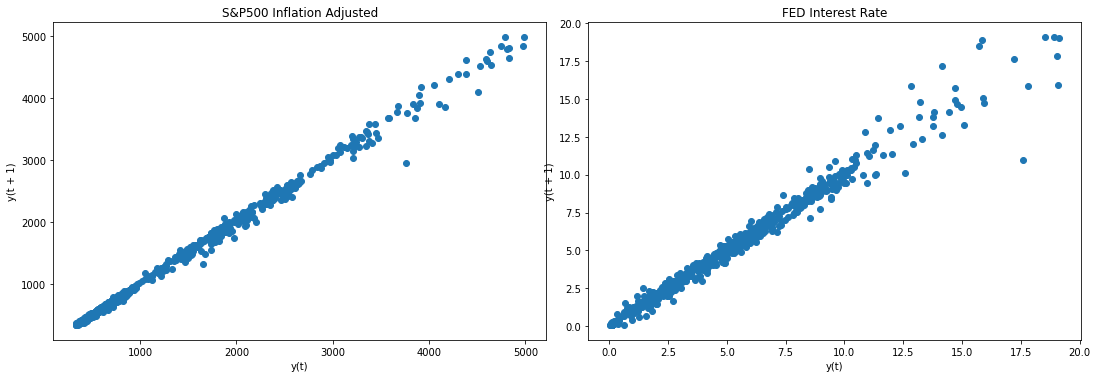

In [61]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
   
f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(spx_filtered['spx_infadj'], ax=ax4)
ax4.set_title('S&P500 Inflation Adjusted');

lag_plot(fed_filtered['interest_rate'], ax=ax5)
ax5.set_title('FED Interest Rate');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()